# Análisis Simulaciones MadGraph/Pythia8/Delphes
Los outputs están en *sim_outputs/*.

In [1]:
import awkward as ak
import pandas as pd
import numpy as np
import vector
from coffea.nanoevents import NanoEventsFactory
from coffea.nanoevents import NanoAODSchema, DelphesSchema
import mplhep as hep
import matplotlib.pyplot as plt
import seaborn as sns
import DM_HEP_AN as dm
from math import pi
from funcs import *
hep.style.use("CMS")
#%matplotlib inline
plt.ioff()

## Simulación con $g_{Sg} = 1.0$ únicamente
Masas: $m_{\chi} = 10$ GeV, $m_{Y_{0}} = 100$ GeV

In [2]:
# Análisis con root file
#rootFile = "./sim_outputs/events_gSg1.root"
#tree_gSg1 = dm.Converter(rootFile)
#tree_gSg1.generate(jet_elements=n_jets, e_mu_elements=n_lep)
#data_gSg1 = tree_gSg1.df
#data_gSg1.to_csv('data/gSg1.csv', index=False)

# Análisis con csv file
csvFile = "./sim_outputs/csv/DM_gSg1_only_1.csv"
data_gSg1 = pd.read_csv(csvFile)

In [3]:
data_gSg1

,jet_pt0,jet_pt1,jet_pt2,jet_pt3,jet_eta0,jet_eta1,jet_eta2,jet_eta3,jet_phi0,jet_phi1,...,jet_btag0,jet_btag1,jet_btag2,jet_btag3,jet_tautag0,jet_tautag1,jet_tautag2,jet_tautag3,missinget_met,missinget_phi
0,69.887054,48.321358,35.474580,34.395100,2.042229,1.491570,0.311072,-1.021008,1.280188,-1.110395,...,0,0,0,0,0,0,0,0,2.264751,-1.367289
1,86.648550,57.540382,34.016780,14.277767,1.048043,0.982511,-2.039386,-2.546717,-0.732698,3.047815,...,0,0,0,0,0,0,0,0,2.135849,1.965944
2,118.152960,53.064068,47.206930,37.293976,-0.461662,-2.920310,0.003247,-0.684139,-2.351829,-0.396336,...,0,0,0,0,0,0,0,0,1.894290,0.231903
3,106.924520,52.781948,45.000042,20.641047,0.588055,1.173372,0.550984,4.000485,0.508944,-0.848175,...,0,0,0,0,0,0,0,0,4.152169,1.496141
4,86.249920,84.185380,45.335110,32.761562,-0.051100,-1.374040,1.401536,1.749937,0.972446,-1.807852,...,0,0,0,0,0,0,0,0,1.970777,0.839835
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,141.630130,76.587135,53.090984,18.606950,0.793860,1.681994,1.392357,0.958593,2.203428,-1.443505,...,0,0,0,0,0,0,0,0,4.411808,-0.847326
49996,112.850740,82.530630,38.483240,32.528920,0.664024,-0.690519,-0.050470,1.067365,-2.360347,-0.077464,...,0,0,0,0,0,0,0,0,15.457292,-2.595161
49997,113.134140,97.121490,69.125740,45.539284,-2.323085,-2.295071,-2.707585,1.307371,-1.963631,2.724638,...,0,0,0,0,0,0,0,0,6.688335,-2.795533
49998,73.270270,58.070263,51.215100,30.592869,-2.103491,1.037394,1.422653,1.470525,-2.751510,1.181443,...,0,0,0,0,0,0,0,0,7.038297,1.802665


In [6]:
folder = 'Plots/gSg1/'
makePlots(data_gSg1,folder=folder)

In [4]:
data_gSg1.query('missinget_met > 50 &\
         jet_eta0*jet_eta1 < 0 &\
         (jet_pt0 > 30 | jet_pt1 > 30) &\
         (-5 < jet_eta0 < 5 | -5 < jet_eta1 < 5) &\
         jet_pt0 + jet_pt1 > 200', inplace = True)

## Simulación con $g_{Sg2} = 1.0$ únicamente
Masas: $m_{\chi} = 10$ GeV, $m_{Y_{0}} = 100$ GeV, proceso p p > y0 y0 j j, y0 > xd xd~, y0 > xd xd~

In [4]:
# Análisis con csv file
csvFile = "./sim_outputs/csv/DM_gSg2_only_y0y0_1.csv"
data_gSg2 = pd.read_csv(csvFile)

In [5]:
data_gSg2

,jet_pt0,jet_pt1,jet_pt2,jet_pt3,jet_eta0,jet_eta1,jet_eta2,jet_eta3,jet_phi0,jet_phi1,...,jet_btag0,jet_btag1,jet_btag2,jet_btag3,jet_tautag0,jet_tautag1,jet_tautag2,jet_tautag3,missinget_met,missinget_phi
0,1401.06290,644.73865,404.52737,345.24490,-0.662432,-1.166976,-0.213271,1.897190,-1.559152,1.787413,...,0,0,0,0,0,0,0,0,28.858440,-1.137239
1,441.27682,423.92840,356.39830,284.46716,-1.213299,-0.383676,-0.682843,-1.063968,-2.831883,-0.670356,...,0,0,0,0,0,0,0,0,11.496241,-1.342112
2,990.98145,580.66986,509.66315,413.53064,0.936250,-0.583333,-0.571671,-1.337326,-0.967451,1.472255,...,0,0,0,0,0,0,0,0,146.570680,-1.095308
3,344.12445,257.54276,203.87567,173.19080,0.201840,1.425365,0.677497,0.105189,0.316595,-2.496345,...,0,0,0,1,0,0,0,0,11.600961,-0.096167
4,834.52026,538.38290,374.57590,160.12286,-0.322912,-0.209038,0.080457,1.162180,-0.036877,-2.907119,...,0,0,0,0,0,0,0,0,45.990818,1.293597
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,689.11860,494.55692,381.30110,356.38275,-0.065288,-0.114036,-0.068345,-0.882359,0.271056,-2.953452,...,0,0,0,0,0,0,0,0,23.022871,2.555523
49996,1221.83530,1184.95750,490.42990,248.79701,-0.445929,0.797977,0.185353,0.469608,1.297970,-2.129017,...,2,0,0,0,0,0,0,0,133.015410,1.355066
49997,586.55676,511.64227,436.71768,391.52120,0.465326,0.377621,1.129875,0.295936,-2.529812,2.374526,...,0,0,0,0,0,0,0,0,11.410003,-1.437050
49998,178.18576,108.62380,67.47444,59.01517,0.616692,-1.690791,0.497399,1.255121,2.966606,-0.299651,...,0,0,1,1,0,0,0,0,16.507183,1.297560


In [9]:
folder = 'Plots/gSg2_y0y0/'
makePlots(data_gSg2,folder=folder)

## Simulación con $g_{Sg1} = 1.0$ y $g_{Sg2} = 1.0$ únicamente
Masas: $m_{\chi} = 10$ GeV, $m_{Y_{0}} = 100$ GeV

In [6]:
csvFile = "./sim_outputs/csv/DM_gSg_only_1.csv"
data_gSg = pd.read_csv(csvFile)

In [7]:
data_gSg

,jet_pt0,jet_pt1,jet_pt2,jet_pt3,jet_eta0,jet_eta1,jet_eta2,jet_eta3,jet_phi0,jet_phi1,...,jet_btag0,jet_btag1,jet_btag2,jet_btag3,jet_tautag0,jet_tautag1,jet_tautag2,jet_tautag3,missinget_met,missinget_phi
0,352.07150,255.532910,68.401760,51.910866,2.239333,1.009653,1.124808,1.988698,0.350605,-3.025631,...,0,0,0,0,0,0,0,0,28.298779,-2.855393
1,532.83860,328.070920,169.846530,144.968770,1.313136,-0.057560,1.163203,-0.345123,-0.269930,2.400429,...,0,0,0,0,0,0,0,0,8.649386,-2.691460
2,76.49551,67.769325,63.699486,50.141315,0.442931,0.746071,-2.466331,-2.064824,-2.398833,2.346019,...,0,0,0,2,0,0,0,0,2.688095,-2.539925
3,371.78590,314.358920,213.808980,208.068340,2.209757,0.516816,-0.719295,-0.049255,-1.012078,2.374095,...,0,0,0,0,0,0,0,0,90.538270,-1.244545
4,265.60672,129.515990,99.120700,79.617584,0.129870,0.144333,0.642401,0.703549,-1.956927,0.166176,...,0,0,0,0,0,0,0,0,13.273524,2.515302
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,635.66565,360.771970,255.344040,178.845380,1.300001,-0.083332,0.392670,0.570353,2.699135,-1.234154,...,0,0,0,0,0,0,0,0,24.417370,2.327139
49996,116.06198,63.257626,56.800205,31.376710,-2.326677,0.479836,-1.691236,-4.250624,-2.323087,-0.185732,...,0,0,0,0,0,0,0,0,7.355622,-1.871517
49997,237.06734,181.012950,132.119110,79.503500,-0.226997,-1.090485,-0.936939,-0.401023,-0.773571,1.889514,...,0,0,0,0,0,0,0,0,27.764194,2.494703
49998,379.89170,194.443340,189.431400,116.742320,0.709437,1.709518,0.212267,1.065786,1.790415,-2.493268,...,0,0,0,0,0,0,0,0,29.714487,-0.737265


In [12]:
folder = 'Plots/gSg/'
makePlots(data_gSg,folder=folder)

## Simulación con $g_{Sq} = 1.0$ únicamente
$q = u,d,c,s,b,t$



Masas: $m_{\chi} = 10$ GeV, $m_{Y_{0}} = 100$ GeV

In [8]:
csvFile = "./sim_outputs/csv/DM_gSq_only_1.csv"
data_gSq = pd.read_csv(csvFile)

In [9]:
data_gSq

,jet_pt0,jet_pt1,jet_pt2,jet_pt3,jet_eta0,jet_eta1,jet_eta2,jet_eta3,jet_phi0,jet_phi1,...,jet_btag0,jet_btag1,jet_btag2,jet_btag3,jet_tautag0,jet_tautag1,jet_tautag2,jet_tautag3,missinget_met,missinget_phi
0,37.258022,33.805470,23.066212,19.287022,-2.824002,-0.278092,-2.640385,-0.502611,3.078270,-0.401450,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.643458,-0.534343
1,58.023323,31.753010,25.106430,20.050539,-0.181877,1.515397,0.609946,1.637636,-2.123953,1.692069,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.877452,-0.655954
2,80.523680,47.862198,39.658314,27.952532,-1.656153,-0.033582,-1.162764,3.561825,-1.189526,2.630875,...,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,3.089179,2.242839
3,58.168423,41.196415,15.894178,10.273715,1.157789,3.529536,2.757275,0.339605,-0.600897,2.286596,...,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.775396,0.639895
4,129.693980,106.533630,79.412990,54.912410,-1.178495,1.851556,-1.474818,-0.599300,-0.210689,2.275679,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.638670,-0.908947
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,78.422340,50.431282,46.747986,46.068035,-0.014858,-0.368506,0.089138,0.064112,-1.598157,-0.053262,...,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,2.968513,3.039339
49996,100.042270,40.303684,32.705620,22.224173,0.281914,-0.596048,3.301931,-0.433054,0.658157,2.947000,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.999983,-0.846142
49997,41.362175,39.863953,35.275270,18.648670,2.507014,-1.049313,-0.064253,2.826785,-2.704358,-0.440681,...,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,11.729950,-2.236825
49998,41.776905,37.137170,21.009110,20.022802,0.532165,0.762944,-3.776498,-2.819817,-1.505481,2.322269,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.530724,2.582437


In [15]:
folder = 'Plots/gSq/'
makePlots(data_gSq, folder=folder)

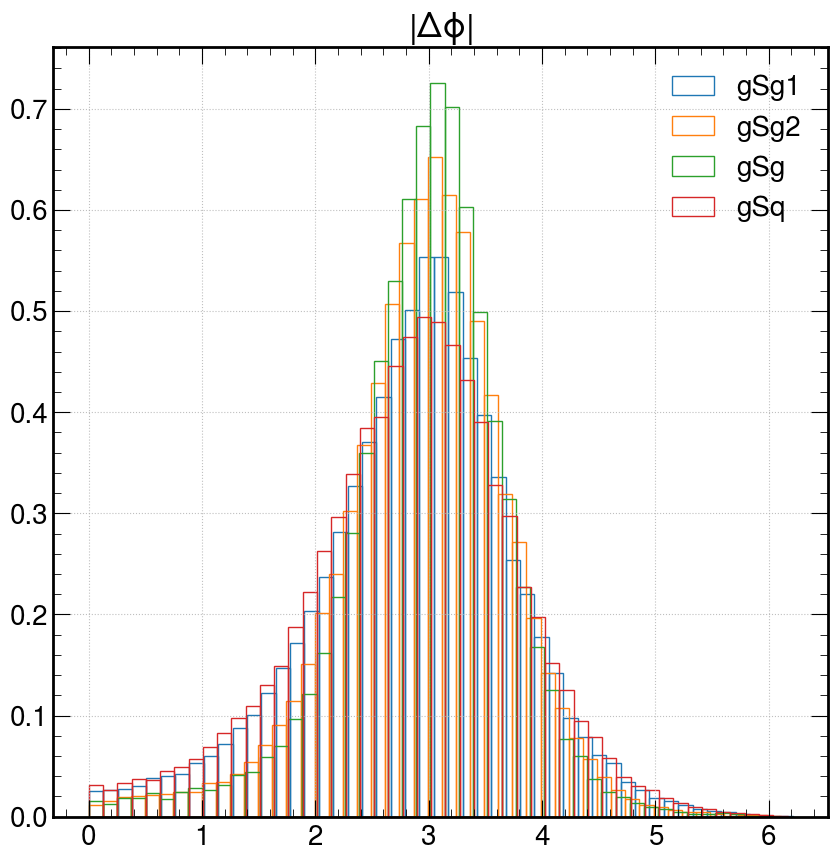

/home/juan/Documents/GitHub/VBFDM_EAFIT/funcs.py:102: RuntimeWarning: invalid value encountered in sqrt
  m = np.sqrt(2 * row['jet_pt0'] * row['jet_pt1'] * \
/home/juan/Documents/GitHub/VBFDM_EAFIT/funcs.py:102: RuntimeWarning: invalid value encountered in sqrt
  m = np.sqrt(2 * row['jet_pt0'] * row['jet_pt1'] * \
/home/juan/Documents/GitHub/VBFDM_EAFIT/funcs.py:102: RuntimeWarning: invalid value encountered in sqrt
  m = np.sqrt(2 * row['jet_pt0'] * row['jet_pt1'] * \
/home/juan/Documents/GitHub/VBFDM_EAFIT/funcs.py:102: RuntimeWarning: invalid value encountered in sqrt
  m = np.sqrt(2 * row['jet_pt0'] * row['jet_pt1'] * \


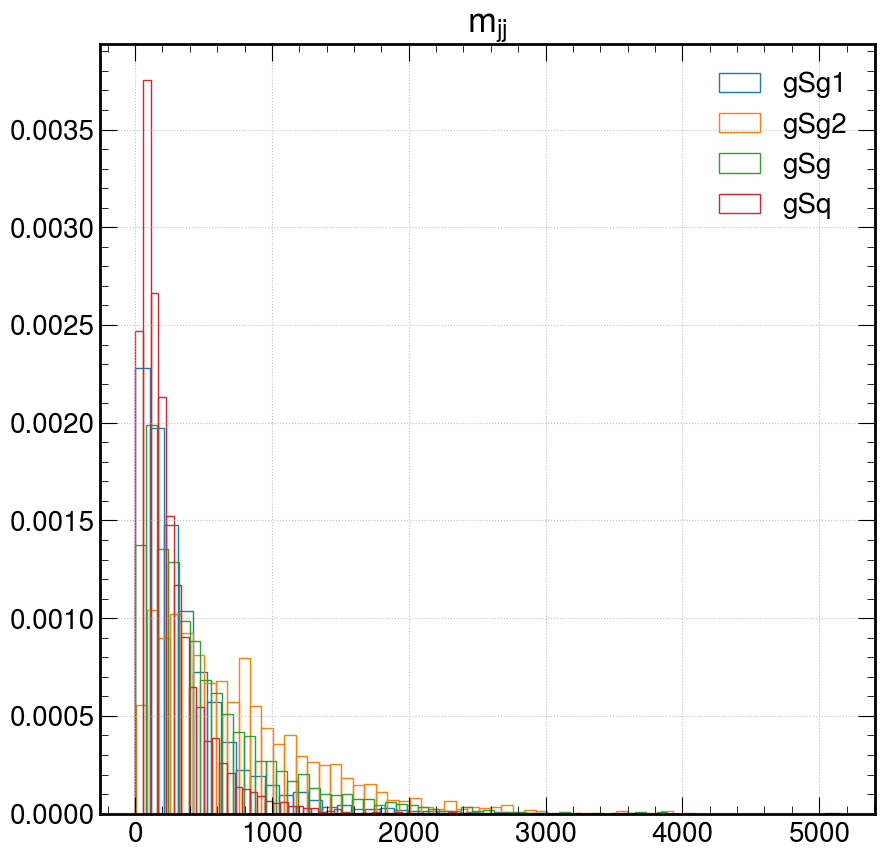

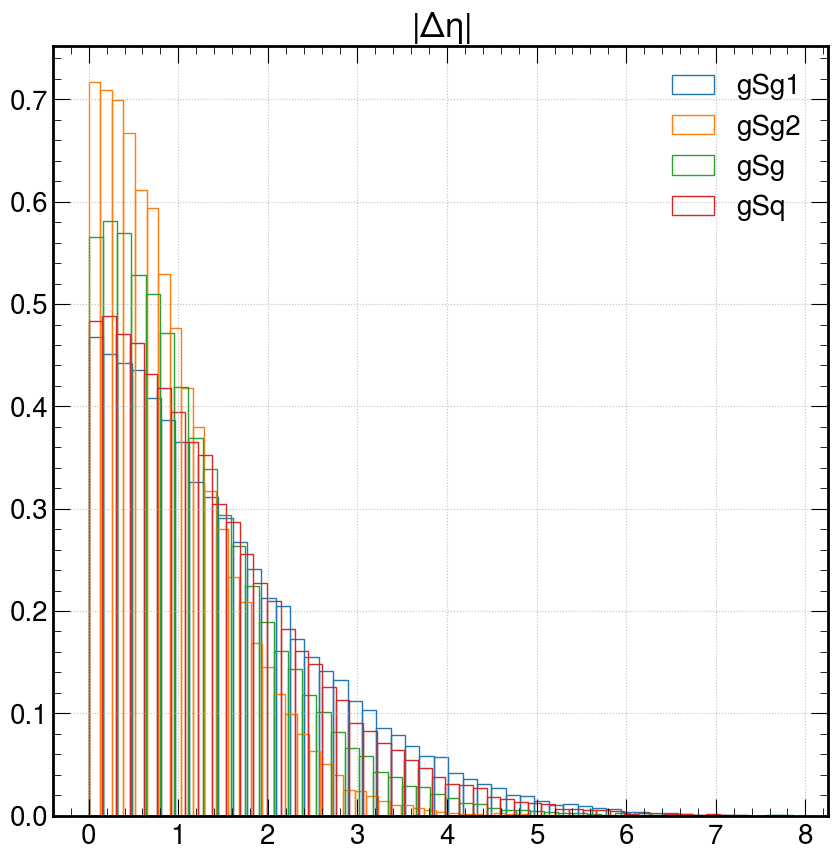

In [10]:
datas = [data_gSg1, data_gSg2, data_gSg, data_gSq]
names = ['gSg1','gSg2','gSg','gSq']

plotObservable(datas, names, 'Azim_diff', plot=True)
plotObservable(datas, names, 'Inv_mass', plot=True)
plotObservable(datas, names, 'Pseudorapidity', plot=True)